In [478]:
import numpy as np
a= np.empty((2,4), dtype=int)
print(a)

[[1813430635 1081858753          0 1076101120]
 [  95443716 1081934939          0 1081597952]]


In [479]:
b= np.ones((3,4),dtype=str)
print(b)

[['1' '1' '1' '1']
 ['1' '1' '1' '1']
 ['1' '1' '1' '1']]


In [480]:
c= np.arange(9)
print(c)

[0 1 2 3 4 5 6 7 8]


In [481]:
import sys
print(sys.executable)

# import sklearn
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Generate a regression problem with specific random_state
X, y = make_regression(n_samples=1000, n_features=4, n_informative=2, random_state=1)

# Create a RandomForestRegressor
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

print(f"Most important feature: {sorted_indices[0]+1}")
print(f"Second most important feature: {sorted_indices[1]+1}")


C:\Program Files\Python311\python.exe
Most important feature: 3
Second most important feature: 2


In [482]:
import sys
print(sys.executable)


C:\Program Files\Python311\python.exe


In [483]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Generate a regression problem with specific random_state
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Define the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the name and importance of the second most important feature
print(f"Second most important feature: Feature {indices[1]}, Importance: {importances[indices[1]]:.4f}")

# Print the name and importance of the most important feature
print(f"Most important feature: Feature {indices[0]}, Importance: {importances[indices[0]]:.4f}")


Second most important feature: Feature 5, Importance: 0.4189
Most important feature: Feature 4, Importance: 0.5321


In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [485]:
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
response=requests.get(url)
df=pd.read_csv(url, header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])


In [486]:
df.head(7)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [488]:
df.shape

(1728, 7)

In [489]:
features=df.iloc[:,: -1]
predictions=df.iloc[:,-1]

In [490]:
features.head(6)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high


In [491]:
predictions.head(6)

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
5    unacc
Name: class, dtype: object

In [492]:
features_cat=pd.get_dummies(features,drop_first=True)
features_cat

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True


In [493]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_cat,predictions,test_size=0.2,random_state=0,shuffle=True)

In [494]:
Train_data= pd.concat([X_train,y_train], axis='columns')
Train_data

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1649,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,unacc
1465,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,unacc
361,False,False,True,True,False,False,True,False,False,True,False,False,True,False,True,unacc
315,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False,unacc
1372,True,False,False,False,False,True,False,True,False,False,True,True,False,False,True,acc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,acc
1216,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,unacc
1653,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,unacc
559,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,unacc


In [495]:
Train_data.describe()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
count,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,unacc
freq,1037,1041,1035,1021,1047,1051,1045,1029,1032,927,920,916,923,912,933,970


In [496]:
corr_mat=Train_data.corr(method='pearson',numeric_only=True)
corr_mat

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
buying_low,1.000000,-0.330120,-0.333976,-0.015677,0.013152,-0.002469,0.011182,-0.015803,0.006254,-0.005640,-0.011812,-0.011781,0.001477,-0.004694,0.003257
buying_med,-0.330120,1.000000,-0.331395,-0.011747,-0.002582,0.013087,-0.012323,-0.004236,-0.005250,-0.004530,0.010689,-0.014140,0.016908,0.014279,-0.013575
buying_vhigh,-0.333976,-0.331395,1.000000,0.016554,-0.008230,0.003483,0.001493,0.005230,0.000461,0.002685,0.017681,0.007039,-0.004422,-0.000036,0.000936
maint_low,-0.015677,-0.011747,0.016554,1.000000,-0.336349,-0.333698,0.015230,-0.023452,0.002176,-0.006495,0.011587,-0.006015,-0.010135,-0.023543,0.009546
maint_med,0.013152,-0.002582,-0.008230,-0.336349,1.000000,-0.317440,-0.002712,0.009416,0.000618,-0.004646,0.014353,0.025146,-0.008112,-0.006876,-0.010234
maint_vhigh,-0.002469,0.013087,0.003483,-0.333698,-0.317440,1.000000,-0.006768,0.005652,-0.014923,0.003694,-0.005940,-0.012949,0.018236,0.026596,-0.016432
doors_3,0.011182,-0.012323,0.001493,0.015230,-0.002712,-0.006768,1.000000,-0.332611,-0.330713,-0.003412,0.019080,0.019127,-0.003316,0.019175,-0.012552
doors_4,-0.015803,-0.004236,0.005230,-0.023452,0.009416,0.005652,-0.332611,1.000000,-0.341094,-0.000774,-0.010577,-0.000102,0.002674,-0.024694,0.011738
doors_5more,0.006254,-0.005250,0.000461,0.002176,0.000618,-0.014923,-0.330713,-0.341094,1.000000,-0.004361,-0.000015,-0.000061,-0.014996,-0.003619,0.008129
persons_4,-0.005640,-0.004530,0.002685,-0.006495,-0.004646,0.003694,-0.003412,-0.000774,-0.004361,1.000000,-0.496470,-0.020919,0.029038,0.010597,0.013724


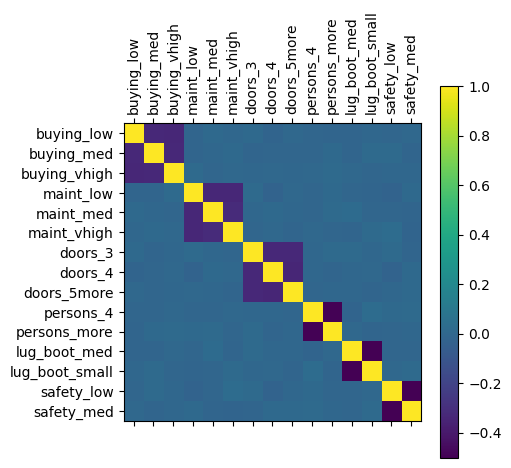

In [497]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

In [498]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy',random_state=42)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)

In [499]:
from sklearn.metrics import f1_score, confusion_matrix
F1_train= f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train,decimals=3))
print("Train Confusion Matrix: ", confusion_mat_train)

F1= f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("Evaluation Metrics: Test Data")
print("Test F1 score: ", np.round(F1,decimals=3))
print("Test Confusion Matrix: ", confusion_mat)
      

evaluation metrics: Train Data
Train F1 score:  1.0
Train Confusion Matrix:  [[305   0   0   0]
 [  0  52   0   0]
 [  0   0 970   0]
 [  0   0   0  55]]
Evaluation Metrics: Test Data
Test F1 score:  0.882
Test Confusion Matrix:  [[ 60   4  15   0]
 [  8   7   0   2]
 [  6   0 234   0]
 [  4   0   0   6]]


In [500]:
model1=RandomForestClassifier(criterion='entropy', random_state=42,min_samples_split=12,n_estimators=80, ccp_alpha=0.001)
model1.fit(X_train,y_train)
y_pred_train=model1.predict(X_train)
y_pred=model1.predict(X_test)

F1_train= f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("Evaluation Metrics: Train Data")
print("train F1 score: ", np.round(F1_train, decimals=3))
print("Train Confusion Matrix:", confusion_mat_train)

F1= f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("Evaluation Metrics: Test Data")
print("Test F1 score:", np.round(F1, decimals=3))
print("Test Confusion matrix:",confusion_mat)

Evaluation Metrics: Train Data
train F1 score:  0.922
Train Confusion Matrix: [[281   0  23   1]
 [ 29  11  10   2]
 [ 12   0 958   0]
 [ 18   0   0  37]]
Evaluation Metrics: Test Data
Test F1 score: 0.831
Test Confusion matrix: [[ 55   2  22   0]
 [ 15   0   0   2]
 [  5   0 235   0]
 [  5   0   0   5]]


In [501]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators': [40, 60, 80, 100, 200, 300, 400, 500],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}

In [502]:
CV_rfc= GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [40, 60, 80, 100, 200, 300, 400, 500]})

In [503]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [504]:
model2=RandomForestClassifier(criterion='entropy', random_state=42,max_depth=10,n_estimators=100)
model2.fit(X_train,y_train)
y_pred_train=model2.predict(X_train)
y_pred=model2.predict(X_test)

F1_train= f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("Evaluation Metrics: Train Data")
print("train F1 score: ", np.round(F1_train, decimals=3))
print("Train Confusion Matrix:", confusion_mat_train)

F1= f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("Evaluation Metrics: Test Data")
print("Test F1 score:", np.round(F1, decimals=3))
print("Test Confusion matrix:",confusion_mat)

Evaluation Metrics: Train Data
train F1 score:  0.996
Train Confusion Matrix: [[305   0   0   0]
 [  0  51   0   1]
 [  3   0 967   0]
 [  2   0   0  53]]
Evaluation Metrics: Test Data
Test F1 score: 0.875
Test Confusion matrix: [[ 60   3  16   0]
 [  9   4   0   4]
 [  5   0 235   0]
 [  3   0   0   7]]


In [505]:
import pandas as pd
dt = pd.read_excel("https://raw.githubusercontent.com/sachinmotwani20/NPTEL-ML_Datasets/main/Rice_Cammeo_Osmancik.xlsx", sheet_name='Rice')
dt.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [506]:
dt.shape

(3810, 8)

In [507]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [508]:
Features=dt.iloc[:,: -1]
Predictions = dt.iloc[:, -1]

In [509]:
Features.head(6)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897


In [510]:
Predictions.head(6)

0    Cammeo
1    Cammeo
2    Cammeo
3    Cammeo
4    Cammeo
5    Cammeo
Name: Class, dtype: object

In [511]:
features_cat=pd.get_dummies(Features,drop_first=True)
features_cat

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [512]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(features_cat, Predictions, test_size=0.2, random_state=0, shuffle=True)
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [513]:
train_data= pd.concat([X_train,y_train], axis= 'columns')
train_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3257,11494,433.058014,171.582458,86.878693,0.862335,11858,0.759382,Osmancik
3017,10638,407.207001,168.552124,81.188492,0.876346,10834,0.675815,Osmancik
3355,10974,413.500000,170.567825,83.244881,0.872818,11142,0.764100,Osmancik
1763,12140,441.498993,182.433990,85.498192,0.883382,12358,0.589607,Osmancik
1044,14623,499.312988,208.228378,91.473145,0.898344,15085,0.583566,Cammeo


In [514]:
train_data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,12669.304462,454.341031,188.856054,86.284311,0.887063,12953.595801,0.662277
std,1741.777485,35.668145,17.471010,5.799450,0.020781,1786.085913,0.077709
min,7551.000000,359.100006,147.798889,59.532406,0.777233,7723.000000,0.497413
25%,11369.000000,426.204254,174.392666,82.688734,0.872531,11625.500000,0.598047
50%,12417.500000,448.847000,185.755844,86.415630,0.889123,12705.500000,0.647348
75%,13944.000000,483.692993,203.888664,90.130583,0.902866,14275.500000,0.728160
max,18313.000000,548.445984,239.010498,107.542450,0.948007,18724.000000,0.861050


In [515]:
corr_mat= train_data.corr(method='pearson',numeric_only=True)
corr_mat

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966287,0.901735,0.790314,0.340408,0.998957,-0.055904
Perimeter,0.966287,1.000000,0.971697,0.631731,0.535591,0.969530,-0.127035
Major_Axis_Length,0.901735,0.971697,1.000000,0.452985,0.704140,0.901860,-0.138456
Minor_Axis_Length,0.790314,0.631731,0.452985,1.000000,-0.299816,0.790064,0.071474
Eccentricity,0.340408,0.535591,0.704140,-0.299816,1.000000,0.340622,-0.204477
Convex_Area,0.998957,0.969530,0.901860,0.790064,0.340622,1.000000,-0.060147
Extent,-0.055904,-0.127035,-0.138456,0.071474,-0.204477,-0.060147,1.000000


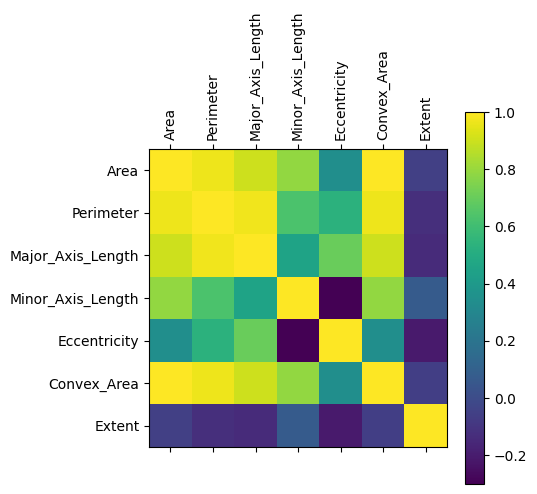

In [516]:

plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

In [517]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy',random_state=42) 
model.fit(X_train, y_train) 
y_pred_train = model.predict(X_train) 
y_pred = model.predict(X_test) 

In [518]:
from sklearn.metrics import f1_score, confusion_matrix
F1_train= f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train= confusion_matrix(y_train, y_pred_train)
print("train F1 score: ", np.round(F1_train,decimals=3))
print("Confusion Matrix: \n", confusion_mat_train)

F1= f1_score(y_test, y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("test F1 score: ", np.round(F1, decimals=3))
print("Confusion Matrix:\n", confusion_mat)

train F1 score:  1.0
Confusion Matrix: 
 [[1293    0]
 [   0 1755]]
test F1 score:  0.924
Confusion Matrix:
 [[304  33]
 [ 25 400]]


In [519]:
mode1= RandomForestClassifier(criterion='entropy', random_state=42, min_samples_split=12, n_estimators=80, ccp_alpha=0.001)
mode1.fit(X_train,y_train)
y_pred_train= mode1.predict(X_train)
y_pred= mode1.predict(X_test)

F1_train=f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("train F1 score:", np.round(F1_train, decimals= 3))
print("Confusion Matrix:\n", confusion_mat_train)

F1=f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test, y_pred)
print("test F1 score: ", np.round(F1, decimals=3))
print("Confusion Matrix: \n", confusion_mat)

train F1 score: 0.962
Confusion Matrix:
 [[1229   64]
 [  51 1704]]
test F1 score:  0.933
Confusion Matrix: 
 [[308  29]
 [ 22 403]]


In [520]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 60, 80, 100, 200, 300, 400, 500],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}

NameError: name 'A100' is not defined

In [ ]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
mode2=RandomForestClassifier(criterion= 'entropy', max_depth= 5, n_estimators= 100)
mode2.fit(X_train,y_train)
y_pred_train=mode2.predict(X_train)
y_pred=mode2.predict(X_test)

F1_train= f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("Evaluation Metrics: Train Data")
print("train F1 score: ", np.round(F1_train, decimals=3))
print("Train Confusion Matrix:", confusion_mat_train)

F1= f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("Evaluation Metrics: Test Data")
print("Test F1 score:", np.round(F1, decimals=3))
print("Test Confusion matrix:",confusion_mat)

In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
df= pd.DataFrame(data=iris.data, columns= iris.feature_names)
df['target']= iris.target
df.head(6)

In [ ]:
df.shape


In [ ]:
df.info()

In [ ]:
features=df.iloc[:,: -1]
predictions=df.iloc[:, -1]


In [ ]:
features.head(6)

In [ ]:
predictions.head(6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features, predictions, test_size= 0.2, random_state=0, shuffle= True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base_classifier= DecisionTreeClassifier(criterion='gini' , random_state= 42, class_weight= 'balanced', ccp_alpha= 0.09)
model= AdaBoostClassifier(estimator= base_classifier, n_estimators= 5, random_state= 42)
model.fit(X_train, y_train)
y_pred_train= model.predict(X_train)
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

F1_train= f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train= confusion_matrix(y_train, y_pred_train)
print("Train Data")
print("Train F1 score: ",  np.round(F1_train, decimals= 3))
print("Confusion Matrix:\n", confusion_mat_train)

F1= f1_score(y_test, y_pred, average='weighted')
confusion_mat= confusion_matrix(y_test, y_pred)
print("Test Data")
print("Train F1 score: ", np.round(F1, decimals= 3))
print("Confusion Matrix: \n", confusion_mat)


In [ ]:

path = r"C:\Users\MAYANK PUVVALA\Downloads\jupyter\AirQualityUCI.csv"
air_quality_df = pd.read_csv(path)

air_quality_df= pd.read_csv(path,delimiter=";", decimal=',')

air_quality_df.head(6)

In [ ]:
air_quality_df.shape

In [ ]:
air_quality_df.info()

In [ ]:

air_quality_df = air_quality_df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
air_quality_df = air_quality_df.dropna()
air_quality_df.reset_index(drop=True, inplace=True)


In [ ]:
air_features = air_quality_df.drop(columns=['RH'])
air_predictions= air_quality_df.iloc[:, -2]

print("\nFeatures:")
air_features.head(10)

In [ ]:
features_cat= pd.get_dummies(air_features, drop_first=True)
features_cat.tail(100)

In [ ]:
air_predictions.head(6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(features_cat,air_predictions, test_size=0.2, random_state=0,shuffle=True)

In [ ]:
Train_data= pd.concat([X_train,y_train], axis='columns')
Train_data = Train_data.drop(columns=['RH'])
Train_data.head(6)

In [ ]:
Train_data.shape

In [ ]:
Train_data.describe()

In [ ]:
corr_mat=Train_data.corr(method='pearson',numeric_only=True)
corr_mat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_cols_to_display = 12
corr_mat_small = corr_mat.iloc[:n_cols_to_display, :n_cols_to_display]

plt.figure(figsize=(20, 18))
plt.matshow(corr_mat_small, cmap='coolwarm')
plt.xticks(range(len(corr_mat_small.columns)), corr_mat_small.columns, rotation=90)
plt.yticks(range(len(corr_mat_small.columns)), corr_mat_small.columns)
plt.colorbar()
plt.show()


In [ ]:
import numpy as np
thresholds = [0, 10, 20, 30, 40]

def bin_continuous_to_discrete(value):
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return i + 1 
    return len(thresholds) + 1 

# Apply binning to your continuous target variable
y_train_discrete = np.array([bin_continuous_to_discrete(value) for value in y_train])
y_test_discrete = np.array([bin_continuous_to_discrete(value) for value in y_test])

# Now you can use y_train_discrete and y_test_discrete for classification


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.09, class_weight='balanced', random_state=42)

model = AdaBoostClassifier(
    estimator=base_classifier,  
    n_estimators=5,     
    random_state= 42        
)
model.fit(X_train, y_train_discrete)
y_pred_train= model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(estimator=base_classifier, n_estimators=5, random_state=42)
model.fit(X_train, y_train_discrete)

# Make predictions on the training and testing sets
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

F1_train = f1_score(y_train_discrete, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train_discrete, y_pred_train)

print("Train Score\nF1 score:", np.round(F1_train, decimals=3))
print("Confusion Matrix (Training Set):\n", confusion_mat_train)


F1= f1_score(y_test_discrete, y_pred, average='weighted')
confusion_mat= confusion_matrix(y_test_discrete, y_pred)
print("Test Score\n F1 Score:", np.round(F1, decimals= 3))
print("Confusion Matrix:\n", confusion_mat)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 4],
}

# Create the AdaBoostClassifier model with a DecisionTreeClassifier estimator
estimator = DecisionTreeClassifier(max_depth=0.1, random_state=42)
model = AdaBoostClassifier(estimator=estimator, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train_discrete)  # Make sure y_train is binary

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_test = best_model.predict(X_test)
f1_test = f1_score(y_test_discrete, y_pred_test, average='weighted')  # Make sure y_test is binary
confusion_mat_test = confusion_matrix(y_test_discrete, y_pred_test)

print("Evaluation Metrics: Test Data (Best Model)")
print("Test F1 score:", np.round(f1_test, decimals=3))
print("Test Confusion Matrix:", confusion_mat_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Create an instance of AdaBoostClassifier with the best hyperparameters
best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=best_params['estimator__max_depth'], criterion='entropy', random_state=42),
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Fit the best model to the training data
best_model.fit(X_train, y_train_discrete)  

# Predict on the training data
y_pred_train = best_model.predict(X_train)
f1_train = f1_score(y_train_discrete, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train_discrete, y_pred_train)

# Predict on the test data
y_pred_test = best_model.predict(X_test)
f1_test = f1_score(y_test_discrete, y_pred_test, average='weighted')
confusion_mat_test = confusion_matrix(y_test_discrete, y_pred_test)

print("Evaluation Metrics: Train Data (Best Model)")
print("Train F1 score:", np.round(f1_train, decimals=3))
print("Train Confusion Matrix:", confusion_mat_train)

print("\nEvaluation Metrics: Test Data (Best Model)")
print("Test F1 score:", np.round(f1_test, decimals=3))
print("Test Confusion Matrix:", confusion_mat_test)
